In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [37]:
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
# 使用内置函数做one-hot编码
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

(60000, 28, 28)
Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.1755 - accuracy: 0.9457
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0291 - accuracy: 0.9904


0.9904000163078308

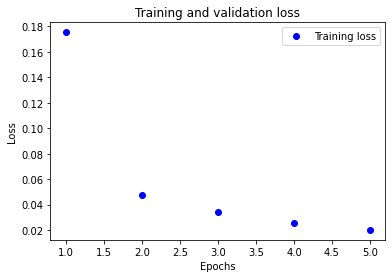

In [38]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    # val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    # plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)

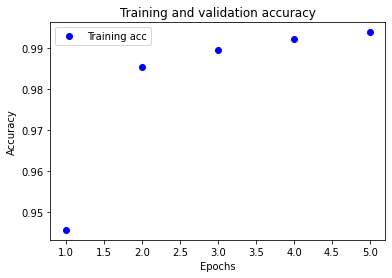

In [39]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['accuracy']
    # val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    # plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

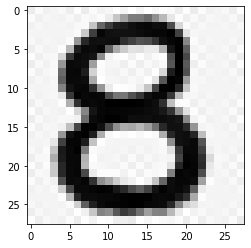

[[3.9839122e-11 1.4612639e-08 2.2272171e-09 4.5495068e-05 1.8017515e-08
  2.7782715e-05 1.3875163e-08 2.5480096e-09 9.9992657e-01 8.2624389e-08]]
8


In [44]:
# 使用训练好的模型，通过样例图片来测试效果
from PIL import Image, ImageOps
import numpy as np

# 读取图片并调整大小
img = Image.open('./data/handwrite/8.jpg').resize((28, 28))
# 样例图片是白底黑字，需要做反值运算为黑底白字
inverted_img = ImageOps.invert(img)


# 将图片转换为numpy数组，并添加通道维度
img_array = np.asarray(inverted_img.convert('L'))
img_array = np.expand_dims(img_array, axis=-1)

# 归一化像素值
img_array = img_array / 255.0
plt.imshow(img_array, cmap=plt.cm.binary)
plt.show()
# 将图片输入模型进行预测
predictions = model.predict(np.array([img_array]))

# 打印预测结果，输出是10个元素向量，每个元素代表对应数字的概率
print(predictions)
# 最高概率的即预测结果
print(np.argmax(predictions[0]))

